# Лабораторная работа 3.
###  Проверка статистических гипотез в виде закона распределения.

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.stats import ksone

*Так как в процессе выполнения работы потребуется сформировать выборку из  n случайных чисел в соответствии с заданным в типовом расчете  Y = f(xᵢ), где Xᵢ - равномерно распределенное число из заданного интервала [a, b], i = 1, ...n, определяется ряд вспомогательных функций:*

In [2]:
a = -2
b = 2


#  Y = f(xᵢ)
def Y(x):
    return x*x


# теоретическая плотность распределения
def f(y):
    return 1/(4 * y**0.5)


# теоретическая функция распределения
def F(y):
    return y**0.5/2


# Определение интервала для значений Y = f(xᵢ)
def find_borders():
    ay = Y(a)
    by = Y(b)
    xes = np.arange(a, b + 0.001, 0.001)
    for x in xes:
        ay = min(ay, Y(x))
        by = max(by, Y(x))
    ay = round(ay, 2)
    by = round(by, 2)
    return ay, by


# Определение количества значений,
# попадающих в пределы заданного интервала:
def number_of_values_on_interval(M, variation, A_intervals, B_intervals):
    v_interval = [0] * M
    for i in range(0, M):
        for value in variation:
            if A_intervals[i] < value < B_intervals[i]:
                v_interval[i] += 1
            if value == B_intervals[i] and i != M - 1:
                v_interval[i] += 0.5
                v_interval[i + 1] += 0.5
    v_interval[0] += 1
    v_interval[-1] += 1
    return v_interval


def possibility_method(variation, M, n):         # равновероятностный метод
    mi = n // M
    B_pos = [(variation[i * mi] + variation[i * mi + 1]) / 2 for i in range(1, M)] + [variation[-1]]
    A_pos = [variation[0]] + B_pos[:-1]
    delta_pos = [B_pos[i] - A_pos[i] for i in range(M)]
    v_pos = number_of_values_on_interval(M, variation, A_pos, B_pos)
    f_pos = [v_pos[i] / (n * delta_pos[i]) for i in range(M)]
    return A_pos, B_pos, f_pos


# Построение гистограммы и полигона распределения
def histogram_n_polygon(M, func, A, B):
    plt.title("Гистограмма\n и полигон\n распределения")
    max_height = [0] * (M + 1)
    for i in range(M):
        max_height[i] = max(func[i-1], func[i])
    max_height[0] = func[0]
    max_height[-1] = func[-1]
    plt.hlines(func, A, B, color='red')
    plt.axhline(0, color='red')
    A.append(B[-1])
    plt.vlines(A, [0], max_height, color='red')
    plt.xlim(A[0] - 0.5, B[-1] + 0.5)
    middle = [(A[i] + A[i + 1])/2 for i in range(M)]
    plt.plot(middle, func, color='blue')


# Построение графика теоретической функции распределения
def theor_density(ay, by, A, B, func):
    plt.title("Теоретическая\n плотность\n  распределения")
    xes = np.arange(ay, by, 0.001)
    ys = [f(x) for x in xes if x != 0]
    xes = [x for x in xes if x != 0]
    plt.ylim(-0.1, max(func) + 0.2)
    plt.xlim(A[0] - 0.5, B[-1] + 0.5)
    plt.hlines(0, A[0] - 0.5, 0, color='blue')
    plt.hlines(0, 4, B[-1] + 0.5, color='blue')
    plt.plot(xes, ys, color='blue')


# Построение гистограммы, полигона распределения и теоретической функции
# распределения в одном окне
def graphics(M, func, A, B):
    plt.subplot(1, 3, 1)
    histogram_n_polygon(M, func, A, B)
    plt.grid()
    plt.subplot(1, 3, 2)
    ay, by = find_borders()
    theor_density(ay, by, A, B, func)
    plt.grid()
    plt.show()


# формирование вариационного ряда
def generation_of_the_row(n):
    eps = [np.random.uniform(0, 1) for i in range(n)]
    x = [(ei * (b - a) + a) for ei in eps]
    y = [Y(xi) for xi in x]
    variation = sorted(y)
    return variation


# Выбор параметра M (количества интервалов для группирования данных):
def find_interval_number(n):
    if n <= 100:
        M = int(n**0.5)
    else:
        M = int(random.uniform(2, 4) * math.log10(n))
    return M


# построение теоретической и эмпирической функций распределения
def emp_theor_graphics(ay, by, variation):
    hi = (by - ay) / n
    h_start = [hi*i for i in range(n)]
    h_end = [h + hi for h in h_start]
    f_emp = [len([v for v in variation if v <= hi])/n for hi in h_end]
    plt.subplot(1, 2, 1)
    plt.hlines(f_emp, h_start, h_end, color='red')
    plt.xlim(ay, by)
    plt.title("Эмпирическая функция\n распределения")
    plt.subplot(1, 2, 2)
    arg_list = np.arange(ay, by, 0.001)
    func_theor = [F(x) for x in arg_list]
    plt.plot(arg_list, func_theor, color='blue')
    plt.xlim(ay, by)
    plt.title("Теоретическая функция\n распределения")
    plt.grid()
    plt.show()
    return f_emp

### Критерий согласия Пирсона.
*Формирование выборки из 200 СВ, проверка гипотезы о соответствии выборки теоретическому закону распределения согласно критерию согласия Пирсона.*

In [3]:
def Pearsons_chi_squared_test(M, variation, n):
    A_pos, B_pos, f_pos = possibility_method(variation, M, n)
    graphics(M, f_pos, A_pos, B_pos)
    v_interval = number_of_values_on_interval(M, variation, A_pos, B_pos)
    p_interval = [v_interval[i] / n for i in range(M)]
    p_theor = [F(B_pos[i]) - F(A_pos[i]) for i in range(M)]
    confidence_interval = 0.01
    if abs(1 - sum(p_theor)) > confidence_interval:
        confidence_interval *= 2
    chi_sq = n * sum([(p_theor[i] - p_interval[i]) ** 2 / p_theor[i] for i in range(M)])
    print("Pearson's chi-squared test:")
    if chi_sq < chi2.isf(confidence_interval, M - 1):
        print("True: ", chi_sq, " < ", chi2.isf(confidence_interval, M - 1))
    else:
        print("False: ", chi_sq, " > ", chi2.isf(confidence_interval, M - 1))

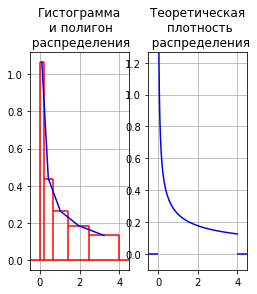

Pearson's chi-squared test:
True:  0.564779494041626  <  11.667843403834782


In [4]:
n = 200                                  # Критерий Пирсона
variation = generation_of_the_row(n)
M = find_interval_number(n)
Pearsons_chi_squared_test(M, variation, n)

 ### Критерий согласия Колмогорова.
 *Формирование выборки из 30 СВ, проверка гипотезы о соответствии выборки теоретическому закону распределения согласно критерию согласия Колмогорова.*

In [5]:
def Kolmogorov_test(variation, n):
    ay, by = find_borders()
    emp_theor_graphics(ay, by, variation)
    f_theor = [F(x) for x in variation]
    max_d = max([max(i/n - F(variation[i]), F(variation[i]) - (i-1)/n) for i in range(n)])
    lambda_crit = n ** 0.5 * max_d
    print("Kolmogorov test:")
    kolmogorov_function = n**0.5 * ksone.ppf(1-0.01/2, n)
    if lambda_crit < kolmogorov_function:
        print("True: ", lambda_crit, " < ", kolmogorov_function)
    else:
        print("False: ", lambda_crit, " > ", kolmogorov_function)

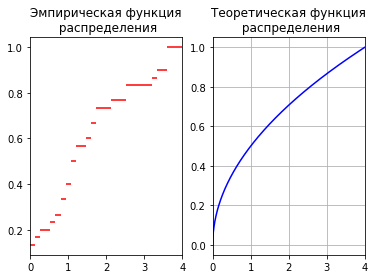

Kolmogorov test:
True:  1.1918807491472347  <  1.5876500066781907


In [6]:
n = 30                                  # Критерий Колмогорова
variation = generation_of_the_row(n)
Kolmogorov_test(variation, n)

 ### Критерий согласия Мизеса.
 *Формирование выборки из 30 СВ, проверка гипотезы о соответствии выборки теоретическому закону распределения согласно критерию согласия Мизеса.*

In [7]:
def Mises_criterion(variation, n):
    f_emp = [(i - 0.5) / n for i in range(n)]
    f_theor = [F(variation[i]) for i in range(n)]
    D = [(f_emp[i] - f_theor[i]) ** 2 for i in range(n)]
    n_w_sq = 1 / (12 * n) + sum(D)
    mises_crit = 0.744          # alpha = 0.01
    print("Mises criterion:")
    if n_w_sq < mises_crit:
        print("True: ", n_w_sq, " < ", mises_crit)
    else:
        print("False: ", n_w_sq, " > ", mises_crit)

In [8]:
n = 50                                 # Критерий Мизеса
variation = generation_of_the_row(n)
Mises_criterion(variation, n)

Mises criterion:
True:  0.2492737470100758  <  0.744
